In [79]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [80]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [81]:
X = data.iloc[:, 3:13]
y = data.iloc[:, 13]

In [82]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [83]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [84]:
X.keys()

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [85]:
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [86]:
geography

,Germany,Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True
...,...,...
9995,False,False
9996,False,False
9997,False,False
9998,True,False


In [87]:
gender

,Male
0,False
1,False
2,False
3,False
4,False
...,...
9995,True
9996,True
9997,False
9998,True


In [88]:
X = X.drop(['Geography', 'Gender'], axis=1)

In [89]:
X = pd.concat([X, geography, gender], axis=1)

In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [91]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [92]:
X_train.shape

(8000, 11)

In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import ReLU, LeakyReLU, PReLU, ELU

In [94]:
classifier = Sequential()

In [95]:
classifier.add(Dense(units = 11, activation = 'relu')) # Input Layers
classifier.add(Dense(units = 6, activation = 'relu')) # Hidden Layer 1
# classifier.add(Dropout(0.2))
classifier.add(Dense(units = 7, activation = 'relu')) # Hidden Layer 2
# classifier.add(Dropout(0.3))
classifier.add(Dense(units = 1, activation = 'sigmoid')) # Output Layer

In [96]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [97]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)

In [98]:
classifier.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [99]:
model_history = classifier.fit(X_train, y_train, validation_split = 0.33, batch_size = 10, epochs = 3)

Epoch 1/3


536/536 [==============================] - 3s 3ms/step - loss: 0.4186 - accuracy: 0.8168 - val_loss: 0.3858 - val_accuracy: 0.8364
Epoch 2/3
536/536 [==============================] - 2s 5ms/step - loss: 0.3655 - accuracy: 0.8436 - val_loss: 0.3883 - val_accuracy: 0.8307
Epoch 3/3
536/536 [==============================] - 2s 4ms/step - loss: 0.3589 - accuracy: 0.8530 - val_loss: 0.3746 - val_accuracy: 0.8444


In [100]:
import tensorflow as tf

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [101]:
model_history = classifier.fit(X_train, y_train, validation_split = 0.33, batch_size = 10, epochs = 1000, callbacks = early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3518 - accuracy: 0.8559 - val_loss: 0.3722 - val_accuracy: 0.8451
Epoch 2/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3511 - accuracy: 0.8556 - val_loss: 0.3676 - val_accuracy: 0.8444
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3461 - accuracy: 0.8580 - val_loss: 0.3811 - val_accuracy: 0.8497


In [102]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

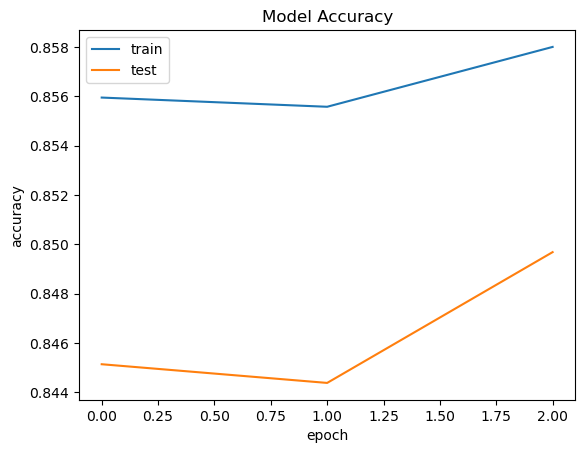

In [103]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

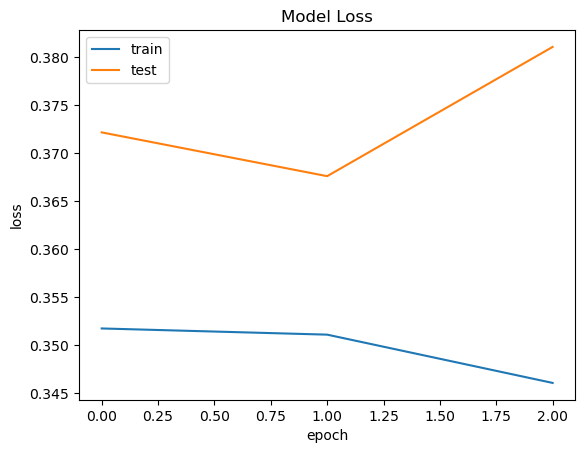

In [109]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [104]:
y_pred = classifier.predict(X_test)
y_pred = y_pred >= 0.5

63/63 [==============================] - 0s 2ms/step


In [111]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_pred, y_test)

# cm = confusion_matrix(y_test, y_pred)
cm

array([[1528,  214],
       [  67,  191]], dtype=int64)

In [112]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred)
score

0.8595

In [107]:
classifier.get_weights()

[array([[-2.44941995e-01, -3.59374374e-01, -2.20094044e-02,
         -1.77048326e-01, -1.45795181e-01, -3.66876781e-01,
          2.79105842e-01,  2.99787764e-02,  3.55707929e-02,
         -1.24103010e-01,  3.30498248e-01],
        [ 1.07374704e+00, -4.02407020e-01, -4.01408494e-01,
         -9.84757721e-01,  5.88871181e-01,  1.66380137e-01,
          9.68919396e-01, -1.50064421e+00,  8.91726911e-02,
          6.37844503e-01,  2.44444489e-01],
        [ 1.15934394e-01, -8.85313228e-02,  3.00218016e-01,
          4.33541834e-01, -2.54232705e-01, -1.29633740e-01,
         -2.66832501e-01, -1.47797540e-01,  4.16869074e-02,
         -1.31075844e-01,  2.33814880e-01],
        [-1.51081290e-03,  1.73665464e-01, -2.98901409e-01,
         -3.78761053e-01,  6.66874507e-03,  5.47844708e-01,
          8.18736553e-01,  1.77166179e-01,  5.34320295e-01,
         -7.53217518e-01, -5.24890006e-01],
        [-3.45463365e-01, -4.53381330e-01,  9.95541811e-01,
         -1.24748230e-01,  2.76511043e-01,  